# Python 机器学习实战 ——代码样例

# 第十三章 主成分分析

## 使用主成分分析 Iris 数据集进行降维

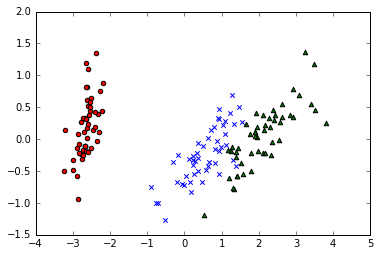

In [4]:
# 将matplotlib的图表直接嵌入到Notebook之中。
%matplotlib inline  

# 导入需要的包。

import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris


# 加载数据集。

data = load_iris()  
y = data.target  
x = data.data  

# 加载 PCA算法，设置降维后主成分数目为 2。

pca = PCA(n_components=2)  

# 得到新的样本点。

reduced_x = pca.fit_transform(x)  
red_x, red_y = [], []  
blue_x, blue_y = [], []  
green_x, green_y = [], []  
  
for i in range(len(reduced_x)):  
    if y[i] == 0:  
        red_x.append(reduced_x[i][0])  
        red_y.append(reduced_x[i][1])  
    elif y[i] == 1:  
        blue_x.append(reduced_x[i][0])  
        blue_y.append(reduced_x[i][1])  
    else:  
        green_x.append(reduced_x[i][0])  
        green_y.append(reduced_x[i][1])  

# 最后，将结果可视化，用三种形状和颜色表示三个类别。

plt.scatter(red_x,red_y,c='r',marker='o')  
plt.scatter(blue_x,blue_y,c='b',marker='x')  
plt.scatter(green_x,green_y,c='g',marker='^')  


## 利用 PCA进行图像压缩

图像可以看作一个二维的矩阵，每个像素点就对应了它的一个特征维度。例如，一幅宽高为 20乘20 个像素的图像就有 400 个特征维度。利用主成分分析，可以允许我们用尽可能少的特征来代表原始图片中的绝大部分信息，从而达到降维、减少计算量的目的。

我们使用的数据集是 MNIST 手写数字数据集，每个样本图像的宽高为 28乘以28，也就是说每个原始样本具有 784 个特征。

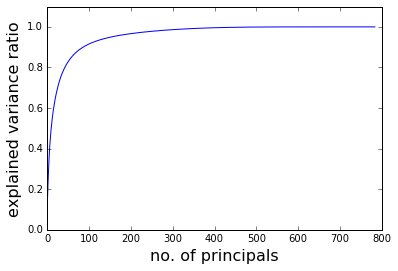

In [5]:
# 导入需要的库。

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA

# 导入 MNIST 数据集。

mnist = fetch_mldata('MNIST original')
x = mnist["data"]
y = mnist["target"]

# 调用 PCA函数。

pca = PCA()
pca.fit(x)

# 计算各个 n 下的累计贡献率。累计贡献率达到 90%时的主成分数目 d=87。

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.9) + 1

# 绘制累计贡献率与主成分数目关系图。

plt.plot(cumsum)
plt.ylim(0,1.1)
plt.xlabel('no. of principals',fontsize=16)
plt.ylabel('explained variance ratio',fontsize=16)


由于压缩时部分信息丢失，图像清晰度将有所降低。下面的代码可以让我们观察主成分数为 5、15、35、85 时，图像的压缩效果。

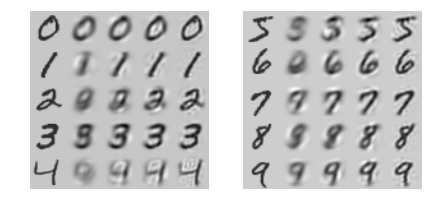

In [7]:
# 用主成分等于5、15、35、85 时降维
Xr = []
for n in [5,15,35,85]:
    pca = PCA(n_components=n)
    X_reduced = pca.fit_transform(x)
    X_recovered = pca.inverse_transform(X_reduced)
    Xr.append(X_recovered)

# 数据整理。

instances = []
for i in range(10):
    instances.append(x[y == i][0])
    for j in range(1,5):
        instances.append(Xr[j-1][y == i][0])

# 绘制效果图。

def plot_digits(instances):
    images = [instance.reshape(28,28) 
                for instance in instances] 
    row_images = []
    for row in range(5):
        rimages = images[row * 5 : (row + 1) * 5]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary)
    plt.axis("off")

plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(instances[:25])
plt.subplot(122)
plot_digits(instances[25:])
plt.show()


上图显示了原始数据 ( 第 1 列 ) 与 PCA压缩恢复后的数据 ( 第 2、3、4、5 列对应的主成分数目分别为 5、15、35、85 )，可见当主成分数目 d=85 时，图像已经相当清晰。